In [1]:
import pandas as pd
import nltk
import numpy as np
from cleantext import clean
import matplotlib as mlb
import seaborn as sns

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
Since the GPL-licensed package `unidecode` is not installed, using Python's `unicodedata` package which yields worse results.
<frozen importlib._bootstrap>:219: RuntimeWarning: num

In [2]:
training_tweets=pd.read_csv('C:/Users/mananshah/Desktop/Study/Datasets/Real or Fake disasters/train.csv')
training_tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
training_tweets['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [7]:
pd.set_option('display.max_colwidth',None)
training_tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


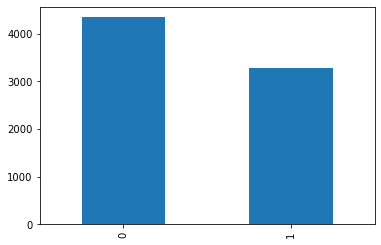

In [12]:
training_tweets['target'].value_counts().plot(kind='bar')

In [13]:
training_tweets['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [14]:
training_tweets.drop(['keyword','location'],axis=1,inplace=True)
training_tweets.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,"13,000 people receive #wildfires evacuation orders in California",1
4,7,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [17]:
training_tweets['text'][1]

'Forest fire near La Ronge Sask. Canada'

In [19]:
clean.clean(training_tweets['text'][1],lower=True,no_urls=True,no_currency_symbols=True,no_digits=True,no_emails=True,no_numbers=True,no_phone_numbers=True,no_punct=True)


'forest fire near la ronge sask canada'

In [20]:
def clean_text(text):
    cleaned_text=clean.clean(text,lower=True,no_urls=True,no_currency_symbols=True,no_digits=True,no_emails=True,no_numbers=True,no_phone_numbers=True,no_punct=True)
    return cleaned_text


In [21]:
training_tweets['clean_text']=training_tweets['text'].apply(clean_text)
training_tweets.head()

,id,text,target,clean_text
0,1,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1,our deeds are the reason of this earthquake may allah forgive us all
1,4,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1,all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected
3,6,"13,000 people receive #wildfires evacuation orders in California",1,<number> people receive wildfires evacuation orders in california
4,7,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1,just got sent this photo from ruby alaska as smoke from wildfires pours into a school


In [22]:
training_tweets.drop(['text'],inplace=True,axis=1)
training_tweets.head()

,id,target,clean_text
0,1,1,our deeds are the reason of this earthquake may allah forgive us all
1,4,1,forest fire near la ronge sask canada
2,5,1,all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected
3,6,1,<number> people receive wildfires evacuation orders in california
4,7,1,just got sent this photo from ruby alaska as smoke from wildfires pours into a school


In [23]:
training_tweets.drop(['id'],inplace=True,axis=1)
training_tweets.head()

,target,clean_text
0,1,our deeds are the reason of this earthquake may allah forgive us all
1,1,forest fire near la ronge sask canada
2,1,all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected
3,1,<number> people receive wildfires evacuation orders in california
4,1,just got sent this photo from ruby alaska as smoke from wildfires pours into a school


In [26]:
training_tweets['clean_text']=training_tweets['clean_text'].astype(str)
training_tweets.head()

,target,clean_text
0,1,our deeds are the reason of this earthquake may allah forgive us all
1,1,forest fire near la ronge sask canada
2,1,all residents asked to shelter in place are being notified by officers no other evacuation or shelter in place orders are expected
3,1,<number> people receive wildfires evacuation orders in california
4,1,just got sent this photo from ruby alaska as smoke from wildfires pours into a school


In [31]:
def tokenize_text(text):
    tokens=[word for word in nltk.word_tokenize(text)]
    return tokens

In [40]:
tokenize_text(training_tweets['clean_text'][1])

['forest', 'fire', 'near', 'la', 'ronge', 'sask', 'canada']

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
vectorizer=TfidfVectorizer(tokenizer=tokenize_text,ngram_range=(1,3),lowercase=False,max_features=10000,max_df=0.75,stop_words='english')
train_vectors=vectorizer.fit_transform(training_tweets['clean_text'])

In [70]:
train_vectors.shape

(7613, 10000)

In [71]:
testing_tweets=pd.read_csv("C:/Users/mananshah/Desktop/Study/Datasets/Real or Fake disasters/test.csv")
testing_tweets.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [72]:
testing_tweets.drop(['id','keyword'],inplace=True,axis=1)
testing_tweets.head()

,location,text
0,NaN,Just happened a terrible car crash
1,NaN,"Heard about #earthquake is different cities, stay safe everyone."
2,NaN,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"
3,NaN,Apocalypse lighting. #Spokane #wildfires
4,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [73]:
testing_tweets.drop(['location'],axis=1,inplace=True)


In [74]:
testing_tweets['clean_text']=testing_tweets['text'].apply(clean_text)
testing_tweets.head()

,text,clean_text
0,Just happened a terrible car crash,just happened a terrible car crash
1,"Heard about #earthquake is different cities, stay safe everyone.",heard about earthquake is different cities stay safe everyone
2,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all",there is a forest fire at spot pond geese are fleeing across the street i cannot save them all
3,Apocalypse lighting. #Spokane #wildfires,apocalypse lighting spokane wildfires
4,Typhoon Soudelor kills 28 in China and Taiwan,typhoon soudelor kills <number> in china and taiwan


In [75]:
testing_tweets.drop(['text'],axis=1,inplace=True)


In [76]:
testing_tweets.count()

clean_text    3263
dtype: int64

In [77]:
test_vectors=vectorizer.transform(testing_tweets.clean_text)

In [78]:
train_vectors.shape

(7613, 10000)

In [54]:
import xgboost as xgb

In [86]:
xgb_clf=xgb.XGBClassifier(n_estimators=300,learning_rate=0.05,random_state=1,n_jobs=3)
xgb_clf.fit(train_vectors,training_tweets['target'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=3, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
predictions=xgb_clf.predict(test_vectors)

In [88]:
len(predictions)

3263

In [89]:
#read sample submission file
sample_submission=pd.read_csv("C:/Users/mananshah/Desktop/Study/Datasets/Real or Fake disasters/sample_submission.csv")
sample_submission.count()       

id        3263
target    3263
dtype: int64

In [90]:
sample_submission['target']=predictions
sample_submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [91]:
sample_submission.to_csv('C:/Users/mananshah/Desktop/Study/Datasets/Real or Fake disasters/Results.csv',index=False)


In [93]:
#using the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_2=CountVectorizer(ngram_range=(1,1), min_df=1)
train_vectors_2=vectorizer_2.fit_transform(training_tweets['clean_text'])
test_vectors_2=vectorizer_2.transform(testing_tweets['clean_text'])


In [94]:
train_vectors_2.shape

(7613, 17256)

In [95]:
test_vectors_2.shape

(3263, 17256)

In [96]:
from sklearn.naive_bayes import MultinomialNB
mb=MultinomialNB()
mb.fit(train_vectors_2,training_tweets['target'])
predictions_2=mb.predict(test_vectors_2)
len(predictions_2)

3263

In [97]:
#read sample submission file
sample_submission_2=pd.read_csv("C:/Users/mananshah/Desktop/Study/Datasets/Real or Fake disasters/sample_submission.csv")
sample_submission_2['target']=predictions_2
sample_submission_2.to_csv('C:/Users/mananshah/Desktop/Study/Datasets/Real or Fake disasters/Results_2.csv')

[0]
